## Nama : Khairunisa Olive Ektha
## NPM : 24083010120
### Tugas : hitung volume produksi yang menghasilkan kentungan maksimum (pendapatan dari penjualan dikurangi produksi)

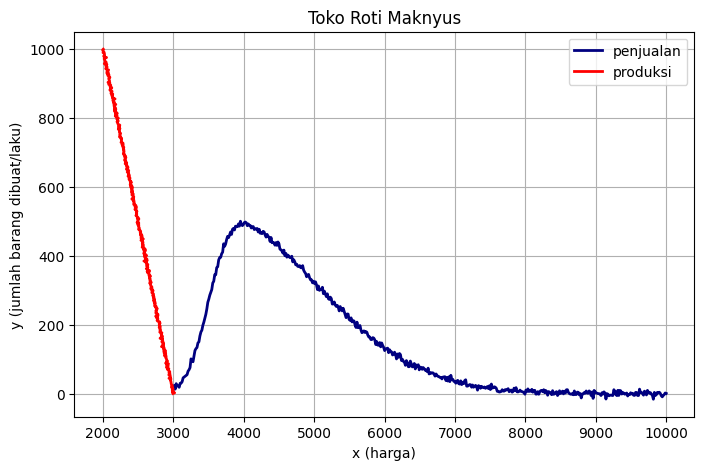

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

# range harga jual
x = np.linspace(3000, 10000, 500)

# rescale parameters
a = 6
loc = 3.5 * 1000     # shift loc
scale = 1.5 * 1000   # widen scale

# probability density, right tail skew
y = skewnorm.pdf(x, a=a, loc=loc, scale=scale) * 1000

np.random.seed(120) # masukkan NPM
y = y + np.random.normal(0, 0.005, size=x.shape)  # add Gaussian noise
y = y*1000

# harga produksi
produksi_y= np.linspace(0, 1000, len(x))
produksi_z = np.linspace(3000, 2000, len(x)) + np.random.normal(0, 0.1, size=x.shape)*100
# linearly decreases from 3000 -> 2000 for quantity 0 -> 1000

# Plot
plt.figure(figsize=(8,5))
plt.plot(x, y, color="navy", label='penjualan', linewidth=2)
plt.plot(produksi_z, produksi_y, color="red", label='produksi', linewidth=2)
plt.title("Toko Roti Maknyus")
plt.xlabel("x (harga)")
plt.ylabel("y (jumlah barang dibuat/laku)")
plt.grid(True)
plt.legend()
plt.show()

# Misalkan:

*   q(x)=y(x) = jumlah terjual pada harga x (dari kurva biru).
*   c(q) = biaya per unit saat memproduksi q unit (dari kurva merah).
*   Pendapatan R(x)=x⋅q(x).
*   Biaya total C(x)=c(q(x))⋅q(x).
*   Laba π(x)=R(x)−C(x)=xq(x)−c(q(x))q(x).

Cari
$$
$\arg\max_{2} \pi(x)
$$

Volume optimal:
$$
q^{*} = q(x^{*})
$$

In [2]:
# ========= 1) Siapkan fungsi biaya per unit sebagai fungsi q =========
import numpy as np

# q_demand = y adalah jumlah yang laku pada harga x
q_demand = y

# Jaga agar q ada di domain kurva biaya (0..1000)
valid = (q_demand >= 0) & (q_demand <= 1000)

# Interpolasi biaya per unit c(q) dari kurva "produksi"
# produksi_y (sumbu Y) = q, produksi_z (sumbu X) = biaya per unit
from numpy import interp
c_unit = np.empty_like(q_demand)
c_unit[:] = np.nan
c_unit[valid] = interp(q_demand[valid], produksi_y, produksi_z)

In [3]:
# ========= 2) Hitung pendapatan, biaya total, dan laba =========
R = np.where(valid, x * q_demand, np.nan)               # revenue
C = np.where(valid, c_unit * q_demand, np.nan)          # total cost
profit = R - C

In [4]:
# ========= 3) Cari maksimum laba =========
i_star = np.nanargmax(profit)
x_star  = x[i_star]
q_star  = q_demand[i_star]
c_star  = c_unit[i_star]
R_star  = R[i_star]
C_star  = C[i_star]
pi_star = profit[i_star]

print("=== Hasil Maksimisasi Laba ===")
print(f"Harga optimal (x*): {x_star:.2f}")
print(f"Volume optimal (q*): {q_star:.2f} unit")
print(f"Biaya per unit di q*: {c_star:.2f}")
print(f"Pendapatan total: {R_star:.2f}")
print(f"Biaya total: {C_star:.2f}")
print(f"Laba maksimum: {pi_star:.2f}")

=== Hasil Maksimisasi Laba ===
Harga optimal (x*): 4486.97
Volume optimal (q*): 440.15 unit
Biaya per unit di q*: 2568.58
Pendapatan total: 1974951.05
Biaya total: 1130565.41
Laba maksimum: 844385.64


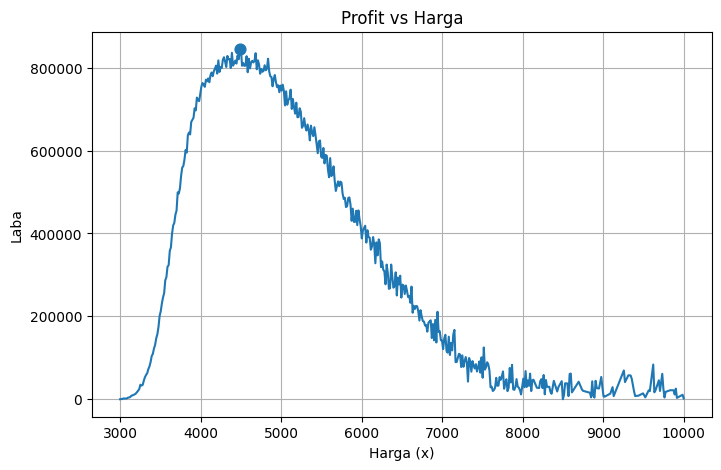

In [5]:
# ========= 4) Visual bantu: profit vs harga =========
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(x[valid], profit[valid])     # jangan set warna khusus: patuhi style default
plt.scatter([x_star], [pi_star], s=60)
plt.title("Profit vs Harga")
plt.xlabel("Harga (x)")
plt.ylabel("Laba")
plt.grid(True)
plt.show()

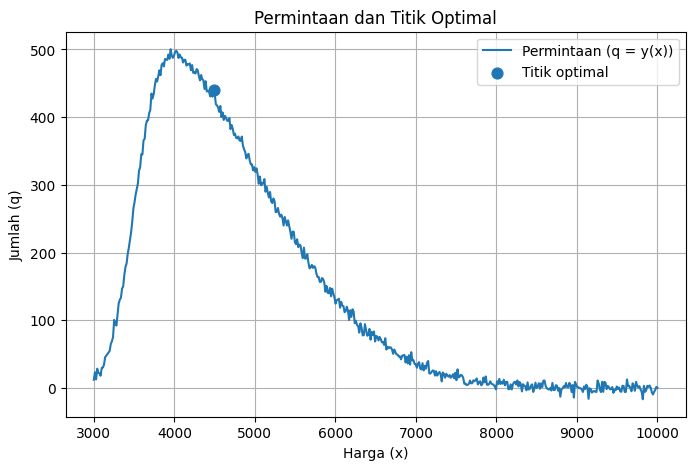

In [6]:
# ========= 5) Tunjukkan titik optimal di kurva permintaan =========
plt.figure(figsize=(8,5))
plt.plot(x, y, label='Permintaan (q = y(x))')
plt.scatter([x_star], [q_star], s=60, label='Titik optimal')
plt.title("Permintaan dan Titik Optimal")
plt.xlabel("Harga (x)")
plt.ylabel("Jumlah (q)")
plt.grid(True)
plt.legend()
plt.show()

Dari perhitungan diperoleh bahwa keuntungan maksimum tercapai pada harga sekitar Rp4.487 dengan volume produksi ±440 unit. Pada titik ini, pendapatan total sekitar Rp1.97 juta, biaya total Rp1.13 juta, dan laba maksimum Rp844 ribu.

Hal ini menunjukkan bahwa produksi lebih dari 440 unit tidak meningkatkan keuntungan karena biaya meningkat lebih cepat daripada tambahan pendapatan.